# Assigment 1

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find stationary equilibrium](#toc2_)    
- 3. [Varying productivity](#toc3_)    
- 4. [Transition path](#toc4_)    
  - 4.1. [Prepare](#toc4_1_)    
  - 4.2. [Find transition path](#toc4_2_)    
  - 4.3. [Analyze](#toc4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

## 1. <a id='toc1_'></a>[Setup and test if model solves](#toc0_)

In [2]:
model = HANCModelClass(name='baseline') # create an instance of the model
par = model.par
ss = model.ss

production_firm: [K] -> [Gamma,L0,L1,rK,w0,w1,Y]
mutual_fund: [K,rK] -> [A,r]
hh: [phi1,r,w0,w1] -> [phi0,A_hh,C_hh,L0_hh,L1_hh]
market_clearing: [A,A_hh,L0,L0_hh,L1,L1_hh,Y,C_hh,K] -> [I,clearing_A,clearing_L0,clearing_L1,clearing_Y]


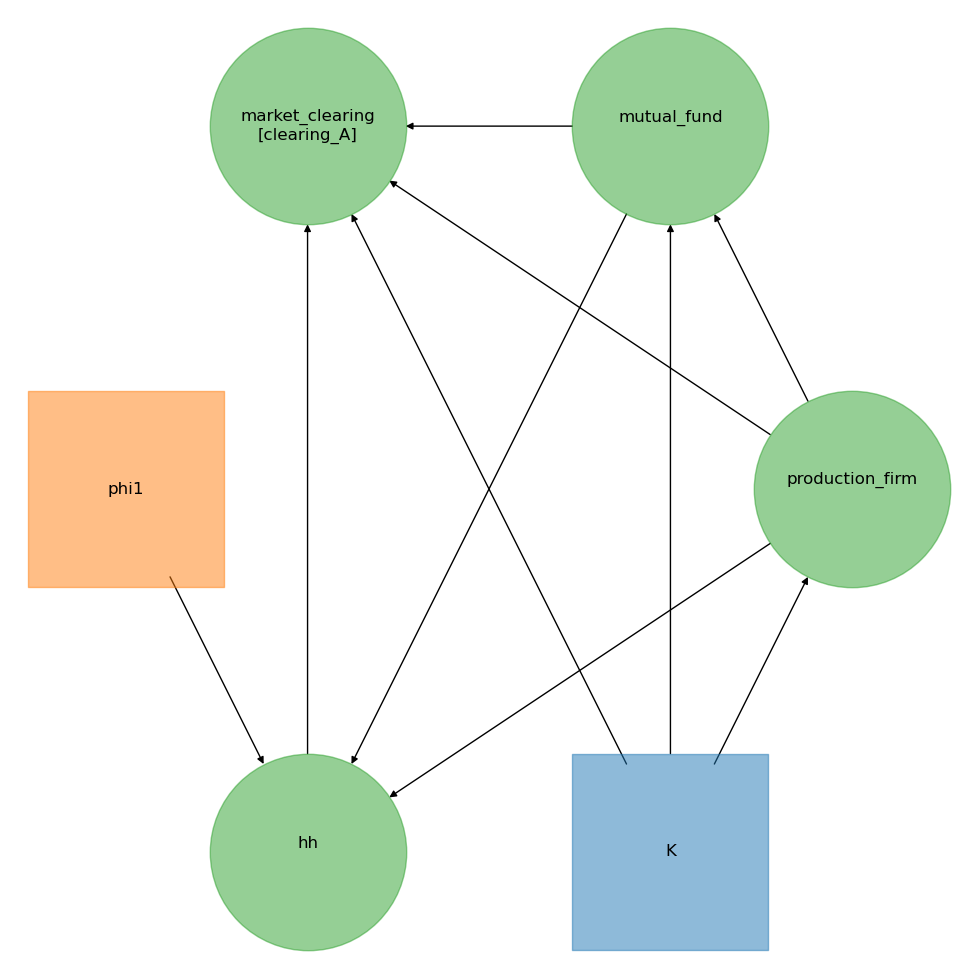

In [3]:
model.info(only_blocks=True)
model.draw_DAG(figsize=(10,10))

### 1.1. <a id='toc1_1_'></a>[Test of Household Problem](#toc0_)

In [4]:
ss.phi0 = 1.0
ss.phi1 = 2.0
ss.r = 0.01 - par.delta
ss.w0 = 1.0
ss.w1 = 1.0

model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [52 iterations]
household problem in ss simulated in 1.0 secs [2 iterations]


## 2. <a id='toc2_'></a>[Find stationary equilibrium](#toc0_)

Find stationary equilibrium:

In [5]:
model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.r = 0.1777
implied ss.w0 = 0.3703
implied ss.w1 = 0.3703
household problem in ss solved in 0.3 secs [342 iterations]
household problem in ss simulated in 0.0 secs [113 iterations]
implied ss.A_hh = 535.9821
clearing_A = -534.98213157

guess ss.K = 2.0000
implied ss.r = 0.0782
implied ss.w0 = 0.4752
implied ss.w1 = 0.4752
household problem in ss solved in 0.6 secs [620 iterations]
household problem in ss simulated in 0.0 secs [374 iterations]
implied ss.A_hh = 512.8555
clearing_A = -510.85553541

guess ss.K = 3.0000
implied ss.r = 0.0375
implied ss.w0 = 0.5499
implied ss.w1 = 0.5499
household problem in ss solved in 0.9 secs [1029 iterations]
household problem in ss simulated in 1.2 secs [13957 iterations]
implied ss.A_hh = 502.9870
clearing_A = -499.98702119

guess ss.K = 4.0000
implied ss.r = 0.0144
implied ss.w0 = 0.6099
implied ss.w1 = 0.6099
household problem in ss solved in 1.6 secs [1725 iterations]
household problem in

In [6]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Gamma          : 1.0000
K              : 4.1098
L0             : 0.6667
L1             : 0.6667
rK             : 0.1124
w0             : 0.6159
w1             : 0.6159
Y              : 1.2831
A              : 4.1098
r              : 0.0124
phi0           : 1.0000
phi1           : 2.0000
A_hh           : 4.1098
C_hh           : 0.8722
L0_hh          : 0.6667
L1_hh          : 0.6667
I              : 0.4110
clearing_A     : 0.0000
clearing_L0    : 0.0000
clearing_L1    : 0.0000
clearing_Y     : 0.0000


### 2.1. <a id='toc2_1_'></a>[Examining stationary equilibrium](#toc0_)

Plot of household behavior for different values of $\beta$ and $z$.

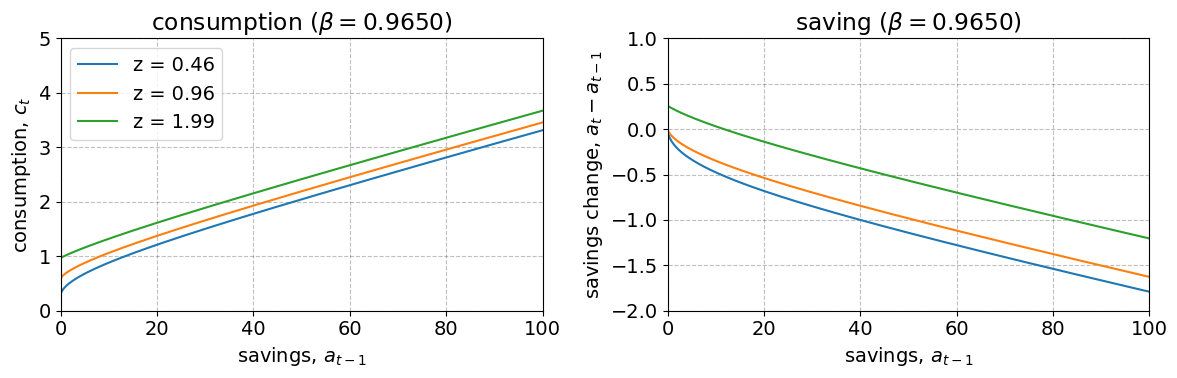

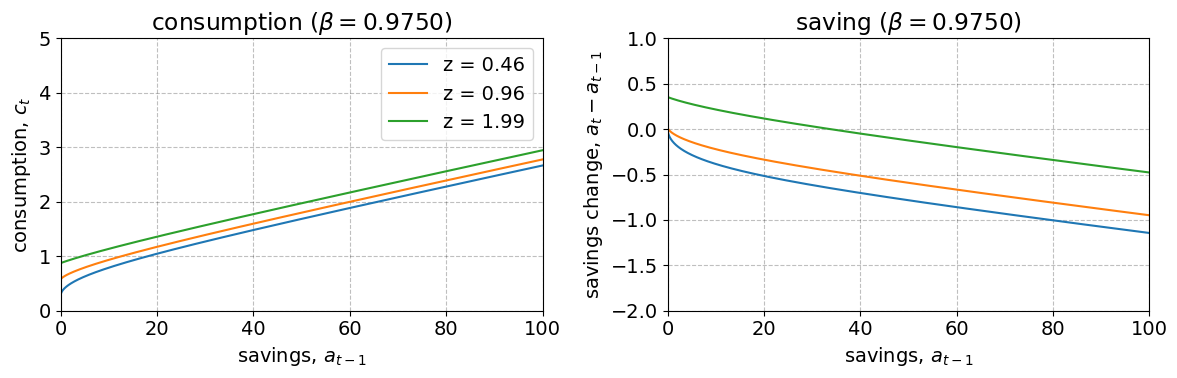

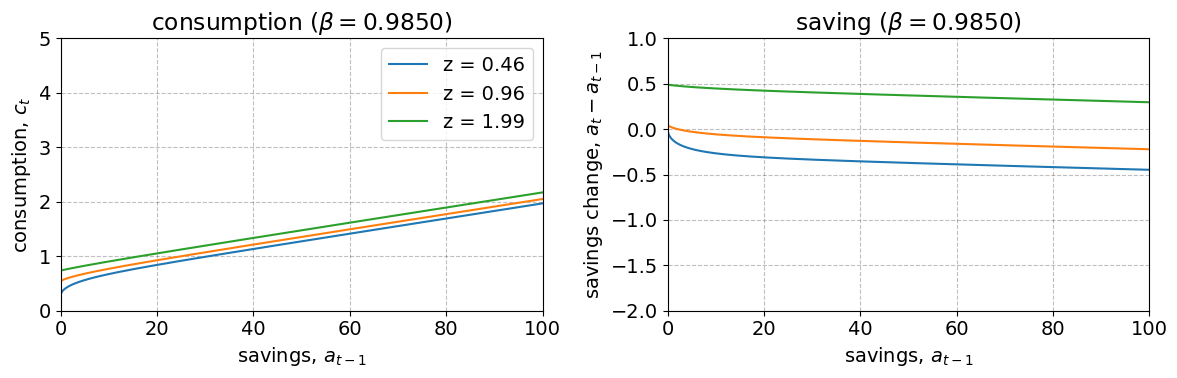

In [7]:
for i_beta,beta in enumerate(par.beta_grid[:len(par.beta_grid)//2]):
    
    fig = plt.figure(figsize=(12,4),dpi=100)

    I = par.a_grid < 500

    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}$)')

    for i_z,z in enumerate(par.z_grid):
        if i_z%3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I],ss.c[i_beta,i_z,I],label=f'z = {z:.2f}')

    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\beta = {beta:.4f}$)')

    for i_z,z in enumerate(par.z_grid):
        if i_z%3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I],ss.a[i_beta,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-2,1)

    fig.tight_layout()
    #fig.savefig(f'figs/c_func_{i_beta}.pdf')

### 2.2. <a id='toc3_2_'></a>[Distributions](#toc0_)

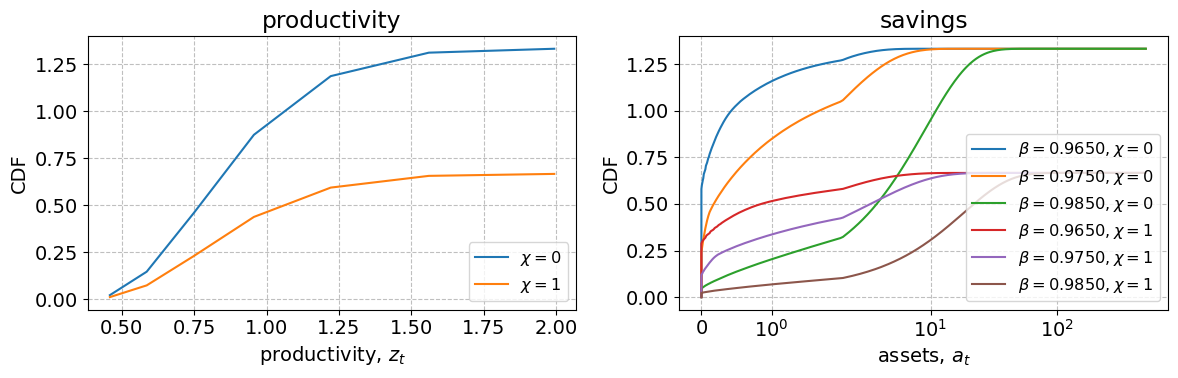

In [19]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
for i_beta,beta in enumerate(par.beta_grid):
    if i_beta in [1,2,4,5]:
        continue
    ax.plot(par.z_grid,np.cumsum(np.sum(ss.D[i_beta],axis=1))*par.Nfix,label=f'$\\chi = {par.eta1_grid[i_beta]:.0f}$')
ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')
ax.legend(loc = 'lower right', fontsize = 'small')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
for i_beta in range(par.Nfix):
    ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D[i_beta],axis=0)),0,0.0)*par.Nfix,label=f'$\\beta = {par.beta_grid[i_beta]:.4f}, \\chi = {par.eta1_grid[i_beta]:.0f}$')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')
ax.legend(loc = 'lower right', fontsize = 'small')
fig.tight_layout()

## 3. <a id='toc3_'></a>[Varying productivity](#toc0_)

### 3.1. <a id='toc4_1_'></a>[Prepare](#toc0_)

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.6 secs
household problem simulated along transition in 0.4 secs



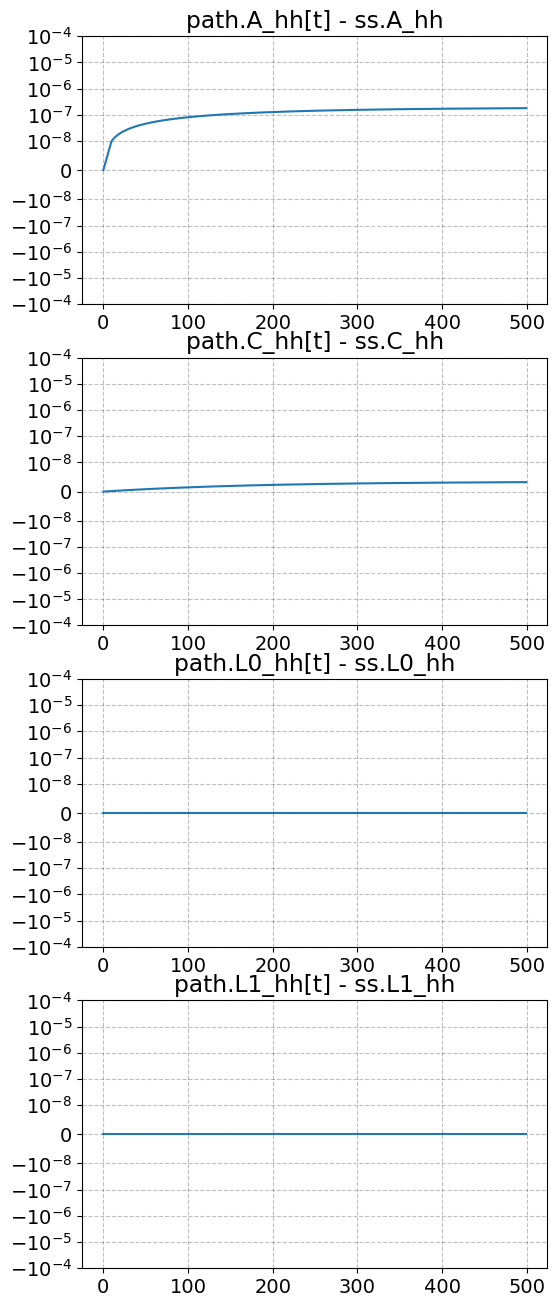

In [9]:
model.test_hh_path()

In [10]:
model.test_path()

shocks: phi1 
unknowns: K 

blocks.production_firm
 Gamma                nan
 L0                   nan
 L1                   nan
 rK                   nan
 w0                   nan
 w1                   nan
 Y                    nan
blocks.mutual_fund
 A                0.0e+00
 r                    nan
hh


AssertionError: invalid values in path.r

**Jacobians:**

In [ ]:
model.compute_jacs()

/Users/johanoelgaard/My Drive/04 Økonomi/07 Adv. Macro/02 Git/AdvMacroAssignments/Assignment 1/v1.1/blocks.py:18: RuntimeWarning: divide by zero encountered in power
  w0[:] = Gamma * (K_lag)**par.alpha * ((1.0-par.alpha)/2.0) * L0**(((1.0-par.alpha)/2.0)-1) * L1**((1.0-par.alpha)/2.0)
/Users/johanoelgaard/My Drive/04 Økonomi/07 Adv. Macro/02 Git/AdvMacroAssignments/Assignment 1/v1.1/blocks.py:18: RuntimeWarning: invalid value encountered in multiply
  w0[:] = Gamma * (K_lag)**par.alpha * ((1.0-par.alpha)/2.0) * L0**(((1.0-par.alpha)/2.0)-1) * L1**((1.0-par.alpha)/2.0)
/Users/johanoelgaard/My Drive/04 Økonomi/07 Adv. Macro/02 Git/AdvMacroAssignments/Assignment 1/v1.1/blocks.py:19: RuntimeWarning: divide by zero encountered in power
  w1[:] = Gamma * (K_lag)**par.alpha * ((1.0-par.alpha)/2.0) * L1**(((1.0-par.alpha)/2.0)-1) * L0**((1.0-par.alpha)/2.0)
/Users/johanoelgaard/My Drive/04 Økonomi/07 Adv. Macro/02 Git/AdvMacroAssignments/Assignment 1/v1.1/blocks.py:19: RuntimeWarning: invalid

**Higher bond price:** Always less savings due to lower return.

**Higher tax rate:**

1. Lower savings when in effect due to lower income
2. Higher savings when expected due to lower *future* income

In [ ]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
    if i == 1:
        ax.legend(frameon=True,bbox_to_anchor=(2.75,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

### 4.2. <a id='toc4_2_'></a>[Find transition path](#toc0_)

In [ ]:
jump = ss.G*0.01
rho = 0.95
dG = jump*rho**np.arange(par.T)

In [ ]:
model.find_transition_path(shocks={'dG':dG},do_print=True) #important you can only call a variable defined as shock already
path = model.path

### 4.3. <a id='toc4_3_'></a>[Analyze](#toc0_)

The government issues more bonds. Bond price fall and tax increases. Average utility falls.

Expected discounted utility falls.

Initially savings increase both due to taxes (less future income) and higher return (lower bond price). Lower taxes reduce savings.

Consumption inequality decreases. But small effect relative to the lower mean.

**Questions:** Will a utiliarian planner always set the tax rate so it maximizes steady state social welfare?

If the initial tax rate is low, the transition is beneficial. Social welfare increases.

If the initial tax rate is high, the transition is not beneficial. Social welfare increase.

**Insight:** Optimal policy needs to account for the transition.

**Questions:** Could there ne another transition, which makes the policy beneficial?
